In [1]:
Info = """Simple self contained program for UI -> COVID
Written By: Joshua Tanner

Self Running Notes:
changing file type to .pyw and setting to open with pythonw.exe works. 
However it is best to have:
1.) A non anaconda version of python installed for self runs (installer can set to sys path): https://www.python.org/downloads/
2.) Updated Pip (not neccesary):
    -Set permenant SSL trusted for PIP (to avoid SSL error): pip install --trusted-host pypi.org --trusted-host files.pythonhosted.org pip setuptools
3.) Make sure the dependencies load as per the below (and check them individually if possible)
    -command prompt (as administrator or using sudo) can install individually if need be (pip install ***)
    -instant crash means it failed
    -it may not work programmatically with missing libraries unless it can be elevated to admin
    
Note: If Anaconda Python was installed to path (it is not recommended) then hunting down all reg keys is needed
"""
#____________________________________________________________________________________________________________
#Libraries

#System - Should Always Load (Base Libraries)
import os, sys, platform              #General OS interaction and major commands
import subprocess                     #Failsafe load
import datetime                       #Useful for time stamping
# import shutil                         #File copying, moving, etc.
# from ast import literal_eval as AE    #For safer string evaluation
import ast                             #For safer string evaluation
# from copy import deepcopy as CY        #Deepcopy command that is easier to use - Note: usually "C"

#GUI
#Super useful general tkinter breakdown
#https://www.devdungeon.com/content/gui-programming-python
from tkinter import *
from tkinter import ttk
from tkinter import font as tkFont    #Used for determining length of text

#Operations
import datetime                       #For WebData Time Formating
from datetime import datetime as dt   #For WebData Time Formating 

try:    
    import urllib.request as request      #For WebData
    import matplotlib.pyplot as plt       #Create Graph
    from matplotlib import lines          #Create Graph

    #Operations
    import numpy as np
    
    Fail = False #Checks if a library failed to load
    
except:
    Fail = True #Checks if a library failed to load

#Library Installer
def install(package, TryJupyter = True, Shell = False):
    try:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package], shell = Shell)
    except:
        if not TryJupyter: return "Subprocess Load Fail... "
        try:
            eval("!{sys.executable} -m pip install %s" % package)
        except:
            return "Jupyter/iPython Notebook Dependency Method Fail... "
        
    return "Package Installed"
        
def install_and_import(package, Overwrite = False, VarUpdate = None):
    
    if Overwrite or package not in globals().keys(): 
        try:
#             __import__('messages_en', globals={"__name__": __name__})
            globals()[package] = __import__(package, globals = globals())
        
            return "Library loaded: %s" % package
        except ImportError:
#         except:
            try:
                pip = __import__("pip", globals = globals())
    
                if int(pip.__version__.split('.')[0])>9:
                    from pip._internal import main as pip_main
                else:
                    from pip import main as pip_main
                    
                try:
                    pip_main(["install", package])
                except SystemExit as e:
                    pass
            except:
                if VarUpdate == None:
                    print(install(package))
                else:
                    VarUpdate.set(install(package))
            finally:
                if package in globals().keys():
                    globals()[package] = __import__(package, globals = globals())
                    return "Package installed -> Library loaded: %s" % package
                else:
                    return "Library failed to load/install: %s" % package
    return "Library Already Loaded: %s" % package

Windows = [] #Top level window holder

class PopUpWindow:
    def __init__(self, master, msg = "", Addons = [], Size = [], Pad = [0, 0, 0, 0], AdjSize = False, YScroll = False, XScroll = False, LibLoad = None, MainMaster = None):
        
        self.master = master
        self.Master = MainMaster
        self.Count = 0
        self.msg = StringVar()
        self.msg.set(msg)
        self.LibLoad = LibLoad
        self.Size = Size
        
        LabelNote = Label(master, textvariable = self.msg, justify = "left")
        
        if "MultiTableInput" in globals().keys() and Addons != []:
            
            if Size == []:
                XAddons = MultiTableInput(master, Addons, Size, Pad, AdjSize, YScroll, XScroll)
                XAddons.pack()
                ExitButton = Button(master, text = "Cancel", command = lambda: self.master.destroy())
                ExitButton.pack()
            else:
                LabelNote.grid(row = 0, column = 0, columnspan = self.Size[0], sticky = "NWES")
                XAddons = MultiTableInput(master, Addons, self.Size[:3] + [int(round(self.Size[3]* self.Size[1]/(self.Size[1]+2+1)))], Pad, AdjSize, YScroll, XScroll, Master = MainMaster)
                XAddons.grid(row = 1, column = 0, rowspan = self.Size[1], columnspan = self.Size[0], sticky = "NWES")
                ExitButton = Button(master, text = "Cancel", command = lambda: self.master.destroy())
                ExitButton.grid(row = self.Size[1] + 1, column = 0, columnspan = self.Size[0], sticky = "NWES")
                for i in range(2 + self.Size[1]+1): master.rowconfigure(i, weight = 1, minsize = int(round(self.Size[3]/(self.Size[1]+2))))
                for i in range(self.Size[0]): master.columnconfigure(i, weight = 1, minsize = int(round(self.Size[2]/self.Size[0])))
                
        elif Addons != []:
            LabelNote.pack()
            FailNote = Label(master, text = "Program Failure", justify = "left")
            FailNote.pack()
            ExitButton = Button(master, text = "Exit", width = 400, command = lambda: self.master.destroy())
            ExitButton.pack()
            ExitButton.focus_set()
        else:
            LabelNote.pack()
            self.Load = LibLoad
            ContinueButton = Button(master, text = "Continue", width = 400, command = lambda: self.Run(self.Count, self.msg))
            ContinueButton.pack()
            ContinueButton.focus_set()

        master.focus_set()

    def Run(self, Count, Note):
        if self.LibLoad != None and Count < len(self.Load):
#             for x in self.Load: Note.set(install_and_import(x, Overwrite = False, VarUpdate = Note))
            Note.set(install_and_import(self.Load[Count], Overwrite = False, VarUpdate = Note))
            self.Count += 1
        else:
            self.Master.destroy()
            
def PopUp(msg = "", Addons = [], Size = [], Pad = [0, 0, 0, 0], AdjSize = False, YScroll = False, XScroll = False, Load = None, Master = None):
    global Windows
    
#     Windows += [Tk()] #Main Loop
    Windows += [Toplevel()]
    Windows[-1].wm_title("Notice")
    if Size != []: Windows[-1].geometry("%dx%d" % (Size[2], Size[3]))                     
    Windows += [PopUpWindow(Windows[-1], msg, Addons, Size, Pad, 
          AdjSize, YScroll, XScroll, Load, Master)]  
    
#     Windows[-2].mainloop() #This is only for main loop
    
NonStandardLibs = ["urllib.request", "numpy", "matplotlib"]                   
CLI = sys.argv

if Fail:
    if len([x for x in CLI if ".json" in x]) > 0 or len([x for x in CLI if ".json" not in x]) <= 2:                     
        Windows += [PopUp("Failed to Load Libraries\nAttempting Dependency Install...", Load = NonStandardLibs)]
#         Windows[-2].mainloop() #****************        
        if len([x for x in NonStandardLibs if x not in globals().keys()])>0: sys.exit("Failed to load")
    else:
        for x in NonStandardLibs: print(install_and_import(x, Overwrite = False))

#Sub non standard libraries
import urllib.request as request      #For WebData
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

#Base Settings - Global
Settings = {"Size": [], "OS": ""}

In [2]:
#Read and calculate from CSV Data

#Typical Types/Shorthands
C = "Confirmed"
D = "Deaths"
R = "Recovered"
T = "Total"
S = "Sick"
P = "Place"

CTRA  = "Confirmed to Recovered Avg" #Average Time Sick to Recovered (Sick not Confirmed)
CTDA  = "Confirmed to Death Avg"     #Average Time Sick to Death to Recovered (Sick not Confirmed)
ByDGC = "By Day Growth: Confirmed"
ByDGS = "By Day Growth: Sick"
ByDGD = "By Day Growth: Deaths"

St = "State"
States = {'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', "District of Columbia" : "DC", "Other" : "Others (Puerto Rico etc..)"}

#Process Date Info
def Date(In, Out = "num", Day0 = dt(2020, 1, 22), Custom = "%m-%d-%Y"):    
    if isinstance(In, str): 
        DateStyle = "%m/%d/%Y"                   #Style of John Hopkins Data
        if "-" in In: 
            DateStyle  = "%m-%d-%Y"     #Base Style
            if len(In.split("-")[0])> 2: 
                DateStyle  = "%Y-%m-%d"
        elif "/" in In and len(In.split(" ")[0].split("/")[2]) == 2: 
            DateStyle = "%m/%d/%y"
        
        if ":" in In: DateStyle += " %H:%M:%S"
        if "m" in In.lower(): DateStyle += " %p"
        Day = dt.strptime(In, DateStyle)
    elif In.__class__ == datetime.datetime:
        Day = In #- Day0
    else:
        Day = Day0 + datetime.timedelta(days = In)
    
    if Out == "str":
        Day = str(Day).split(" ")[0]
    elif Out == "num":
        Day = str(Day - Day0)
        if Day[0] != "0":
            Day = int(Day.split(" ")[0])
        else:
            Day = 0
    elif Out == "custom":    
        Day = dt.strftime(Day, Custom)
    else:
        print("Error in Date", In)
        Day = 0
               
    return Day

#Get CSV from website
def WebCSV(URL):
    Out = request.urlopen(URL).read().decode('utf8').split("\n")
    Out = [x.replace("\"", "").replace("\'", "").replace(", ", " - ").replace("\r","").replace("*","").split(",") for x in Out]
    return Out

#Either Read saved file (old) or get from the web
def GetData(Type = "web", Save = True, Files = []):
    if Type == "web":
        #Checks for old data first:
#         if "Data" not in globals().keys() and Data == {}: 
        Data = GetData("web-old", False)
#         else:
#             Data = globals()["Data"]
#         Last = Date(Data[C]["Raw"][0][-1], "num") #Dont Add one as there are 2 sets of 3/23 data
        
        Last = len(Data["Time"])  #-1
        Now  = Date(dt.now(), "num")
        
        while Now >= Last:
            try:
                New = WebCSV(r"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/%s.csv" % Date(Last, "custom"))
                New = [x for x in New if len(x)>8]
                
                Blank = [0] * len(Data["Time"])
                if Last!= 61: Data.update({"Time":Data["Time"] + [Last]})
                
                for y in New[1:]:
                    if y[3] not in Data[P].keys(): 
                        Data[P].update({y[3]: {}})
                        for x in [C, D, R]: Data[P][y[3]].update({x: Blank})
                        print("Added: ", y[3])
                    
                    for i,x in enumerate([C, D, R]):
                        if len(Data[P][y[3]][x]) <= Last: 
                            Data[P][y[3]].update({x:Data[P][y[3]][x] + Blank[len(Data[P][y[3]][x]):] + [int(y[7+1])]})
                        else:
                            Temp = Data[P][y[3]][x]
                            Temp[Last] = Temp[Last] + int(y[7+i])
                            Data[P][y[3]].update({x:Temp})
                    
                    if y[3] == "US":
                        if not y[2] in States.keys(): y[2] = "Other"
                        y[2] = States[y[2]]
                            
                        for i,x in enumerate([C,D,R]):
                            if len(Data[St][y[2]][x]) <= Last: 
                                Data[St][y[2]].update({x:Data[St][y[2]][x] + Blank[len(Data[St][y[2]][x]):] + [int(y[7+1])]})
                                
                            else:
                                Temp = Data[St][y[2]][x]
                                Temp[Last] = int(y[7+i])
                                Data[St][y[2]].update({x:Temp})
                    
                    for y in [C,D,R]:
                        for x in Data[P].keys(): 
                            if len(Data[P][x][y]) < Last+1: 
                                Data[P][x].update({y:Data[P][x][y] + Blank[len(Data[P][x][y])-1:]})
                        for x in Data[St].keys(): 
                            if len(Data[St][x][y]) < Last+1: 
                                Data[St][x].update({y:Data[St][x][y] + Blank[len(Data[St][x][y])-1:]})
                        
                
#                     Data[x].update({"Raw": [y if Last==61 else y + ["0"] if n!=0 else y + [Date(New[1][4], "custom", Custom = "%m/%d/%Y")] for n,y in enumerate(Data[x]["Raw"]) ] + [[y[2], y[3], y[5], y[6]] +(["0"]*Last) + [y[7+i]] for y in New[1:] if len(y)>9]})
                for x in [C,D,R]:
                    Data[T].update({x: [sum([Data[P][y][x][n] for y in Data[P].keys()]) for n,q in enumerate(Blank)]})                

                print("Grabbed Data for: %s" % Date(Last, "custom"))
            except:
                print("Failed to load day: %s" % Date(Last, "custom"))
                
            Last += 1
            
        Data[P].update({T: Data[T]})
                      
    elif Type == "web-old":
        #Data for - https://www.arcgis.com/apps/opsdashboard/index.html#/bda7594740fd40299423467b48e9ecf6
#John Hopkins COVID dashboard

        #Changed on 3/23 to new data source type. Will from here on out get base data and add to previous data by daily log
#         #Pre 3/23/2020
#         Data = {C: {"URL": r'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'}, D: {"URL": r'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'}, R: {"URL": r'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Recovered.csv'}}
        
#         #Global switched out in new format(no state info!!)
#         Data = {C: {"URL": r'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'}, D: {"URL": r'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'}, R: {"URL": r'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_Recovered_global.csv'}}
        Data = {C:{}, D:{}, R:{}}
        for x in Data.keys():
            URL = "https://github.com/CSSEGISandData/COVID-19/raw/master/archived_data/archived_time_series/time_series_19-covid-%s_archived_0325.csv" % x
            Data[x].update({"Raw": WebCSV(URL)})
            Data[x].update({"Raw": [y for y in Data[x]["Raw"] if len(y)>2]})
        
        Data = ProcessRaw(Data)
        return Data
    
    elif Type == "file":
        if File == []: 
            Data = {C: {"file": "ncov-Confirmed.csv"}, D: {"file": "ncov-Deaths.csv"}, R: {"file": "ncov-Recovered.csv"}}
        else:
            Data = {C: Files[0], D: Files[1], R: Files[2]}
        
        for x in Data.keys():
            file = Data[x]["file"]
            with open(file, "r") as RF: Data[x].update({"Raw": [[z if z != "" else 0 for i,z in enumerate(y.replace(", ", " - ").replace("\r","").split(","))] for y in RF.read().replace("\"", "").replace("\'", "").split("\n") if len(y)>2], "Place": {}})
        return ProcessRaw(Data)

    if Save:
        for x in Data.keys():
            file = "COVID - %s - %s.csv" % (str(x), Date(dt.now(), "str"))
            with open(file, "w") as WF:
                WF.write("\n".join([",".join(str(y)) for y in Data[x]]))
    
    return Data

def ProcessRaw(Data):
    Data.update({"Time":[], P:{}, St: {}, T:{}})
    #Gets all dates (to ensure that everything has the same group of dates for same length lists), and places (to make sure all data has a place)
    for x in [C, R, D]:
        Times  = [Date(y, "num") for y in Data[x]["Raw"][0][4:] if Date(y, "num") not in Data["Time"]]
        Places = [y[1] for y in Data[x]["Raw"][1:] if len(Data[x]["Raw"]) > 1 and len(y)>1 and y[1] not in Data[P].keys()]
        State  = [y[0].split(" - ")[-1].strip(" ") if len(y[0].split(" - ")) > 1 else States[y[0].strip(" ")] if y[0] in States else States["Other"] for y in Data[x]["Raw"][1:] if y[0] != "" and y[0] not in Data[St].keys() and y[1].upper() == "US"]
        
        Data.update({"Time": sorted(Data["Time"] + Times)}) #**** Add process to seperate things like day # ?*****
        for y in Places: Data[P].update({y:{}})
        for y in State: Data[St].update({y:{}})
                                         
    Blank = [0] * len(Data["Time"])
    for y in Data[P].keys():  Data[P][y].update({C: Blank, D: Blank, R: Blank})
    for y in Data[St].keys(): Data[St][y].update({C: Blank, D: Blank, R: Blank})
        
    for x in [C, R, D]:
#         Data[T].update({x: Blank})
        NewT = Blank
        qTime = [Date(q, "num") for q in Data[x]["Raw"][0][4:]]
        for z in Data[x]["Raw"][1:]:
            New  = [0 if y not in qTime or z[4:][qTime.index(y)] == '' or qTime.index(y)>=len(z[4:]) else int(z[4:][qTime.index(y)]) for y in Data["Time"]]
            New  = [y if i == 0 or (y == 0 and len([q for q in New[:i+1] if q!=0]) == 0) else [q for q in New[:i+1] if q!=0][-1] for i,y in enumerate(New)]
            NewT = [y + NewT[i] for i,y in enumerate(New)] 
            Data[P][z[1]].update({x:[y + Data[P][z[1]][x][i] for i,y in enumerate(New)]})
            if z[0] != "" and z[0] not in Data[St].keys() and z[1].upper() == "US":
                if len(z[0].split(" - ")) > 1: 
                    State = z[0].split(" - ")[-1].strip(" ")
                elif z[0] in States:
                    State = States[z[0]]
                else:
                    State = States["Other"]
                Data[St][State].update({x: [y + Data[St][State][x][i] for i,y in enumerate(New)]})
            
        del(Data[x]["Raw"])
                
        Data[T].update({x: [sum([Data[P][y][x][n] for y in Data[P].keys()]) for n,q in enumerate(Blank)]})            
    Data[P].update({T: Data[T]})
    return Data 



def CalcData(SubData):
    CL = SubData[C]
    DL = SubData[D]
    RL = SubData[R]
    
    SubData.update({S: [x - DL[i] - RL[i] for i,x in enumerate(CL)]}) #Sick
#     SubData.update({CTRA:  []})
#     SubData.update({CTDA:  []})
    SubData.update({ByDGC: [0] + [x - CL[i] for i,x in enumerate(CL[1:])]}) # By day growth rate confirmed
    SubData.update({ByDGS: [0] + [x - SubData[S][i] for i,x in enumerate(SubData[S][1:])]}) # By day growth rate sick
    SubData.update({ByDGD: [0] + [x - DL[i] for i,x in enumerate(DL[1:])]}) # By day growth rate death
    
    return SubData

In [3]:
def Extrapolate(Val, ETime = 365):
    #Day(0), Confirmered (1), Sick(2), Sick - Confirmed (3), Recovered (4), Deaths (5), Recovered (day) (6), Died (7), Growth Rate (8), Newly Sick (9), Newly Infected(10), Total Infected(11), Indirect COVID death total(12), Indirect COVID deaths - by day(13)
    
    SD    = int(Val["Start Date"])
    GR    = float(Val["Growth Rate"])
    Shift = int(Val["Initial Shift"])
    DR    = float(Val["Death Rate"])
    DCAP  = int(Val["Health care system overrun # of sick"])
    NDCAP = float(Val["Death Rate - Health care system overran"])
    SSD   = [int(x) for x in Val["Social Distancing - Change Dates"]]
    DSD   = [float(x) for x in Val["Social Distancing - Change"]]
    pop   = int(Val["Population"])
    TD    = int(Val["Average time to death"])
    RT    = int(Val["Average time to recovery"])
    DT    = int(Val["Average time to detection"])
    NDMR  = float(Val["Normal daily mortality rate (per million)"])
    NICU  = float(Val["Normal ICU survial rate"])
    OICU  = float(Val["No ICU available survial rate"])
    NICUP = int(Val["Normal ICU need by day"])
    AIS   = int(Val["Average infected to symptoms"])
    ICUR  = float(Val["COVID ICU need rate"])
    
    
    Flag  = [] #Health care overrun flag
    
    Base = 11 + Shift
    EST  = [[x-100 + min(0, SD), 0, 0, 0, 0, 0, 0, 0, GR, 0, 5, Base,0,0] for x in range(100)] #Initial buffer
    
    for i in range(min(0, SD), ETime, 1):
        NS = 0
        NR = 0
        ND = 0
        
        NI = 0
        ID = 0
        
        #Health care over run effect (flag dates)
        if EST[-1][2] > DCAP and EST[-2][2] < DCAP: Flag += [i]

        #Social distancing effect
        if i in SSD: GR = GR/([DSD[n] for n,x in enumerate(SSD) if x == i][0])  

        if i > TD + min(SD,0):  #Time till death 
            #Deaths that day (based on # sick and in need of ICUs)
            ND  = int(round(EST[-TD][10] * (DR * min(DCAP, ICUR * EST[-1][2]) / (max(1, ICUR * EST[-1][2] - DCAP) + DCAP) + NDCAP * (1 - min(DCAP, ICUR * EST[-1][2]) / (max(0, ICUR * EST[-1][2] - DCAP) + DCAP)) ) )) 
            
            #Indirect death (based on # sick and in need of ICUs)
            ID = NICUP * (NICU - OICU) * (1 - min(DCAP, ICUR * EST[-1][2]) / (max(1, ICUR * EST[-1][2] - DCAP) + DCAP))
            EST[-TD][9] = EST[-TD][9] - ND

        if i > RT + min(SD,0):  #Time till recovery
            NR           = EST[-RT][10]   
            EST[-RT][10] = EST[-RT][10] - NR
            EST[-RT][9]  = 0                  #Possibility of no detection if DT>RT (all effects still there)

        GR = GR * max(1 - GR*(EST[-1][11]/(pop-EST[-1][4])), 0)                  #Adjust growth by capacity factor 
        NI = int(min(max(pop - EST[-1][11] - EST[-1][5] - EST[-1][12], 0), 
                     max(round(EST[-1][10] * GR), 0)))                           #Newly Infected
        NS = EST[-AIS][10]                                                       #Newly Sick (from infected)

        #Detection Time
        if i == DT + min(SD,0): EST[-1][1] = Base   
        if i >= DT + min(SD,0):
            EST += [[i,                                                   #Day
                     EST[-1][1] + EST[-DT][9],                            #Confirmed (based on #sick not infected)
                     max(EST[-1][2] + NS - NR - ND, 0),                   #Sick
                     max(EST[-1][1] + EST[-DT][9] - EST[-1][4] - ND,0),   #Sick - Confirmed                 
                     EST[-1][4] + NR,                                     #Total Recovered
                     EST[-1][5] + ND,                                     #Total Died
                     NR, ND, GR, NS,                      #Number Recovered/Died, Growth Rate, Newly Sick
                     NI, EST[-1][11] + NI - NR - ND,      #Newly Infected, Number Infected 
                     EST[-1][12] + ID, ID]]               #Indirect Deaths, Indirect Deaths by day      
        else:
            EST += [[i,
                     0,
                     max(EST[-1][2] + NS - NR - ND, 0),
                     0,
                     EST[-1][4] + NR, 
                     EST[-1][5] + ND, 
                     NR, ND, GR, NS, NI, EST[-1][11] + NI - NR - ND, EST[-1][12] + ID, ID]]
            
#Day(0), Confirmered (1), Sick(2), Sick - Confirmed (3), Recovered (4), Deaths (5), Recovered (day) (6), Died (7), Growth Rate (8), Newly Sick (9), Newly Infected(10), Infected(11), Indirect COVID death total(12), Indirect COVID deaths - by day(13)

    Est = EST[100:]
    Est = {"Time": [x[0] for x in Est], 
           C: [x[1] for x in Est], 
           D: [x[5] for x in Est], 
           R: [x[4] for x in Est], 
           S: [x[2] for x in Est], 
           ByDGD: [x[7] for x in Est], 
           "Sick - Confirmed": [x[3] for x in Est],
           "Growth Rate": [x[8] for x in Est],
           "Newly Sick": [x[9] for x in Est],
           "Infected": [x[10] for x in Est],                        #Shifted from sick to infected
           "Total deaths by day": [x[7] + x[12] for x in Est],
           "Total deaths": [x[5] + x[7] + x[12] for x in Est],
           "Indirect COVID deaths - Total": [x[11] for x in Est],
           "Indirect COVID deaths - by day": [x[12] for x in Est],
           "Normal non COVID deaths in same period": len(Est)* pop * NDMR/1e6,
           "Normal non COVID deaths by day": len(Est)* pop * NDMR/(365* 1e6),
           "Health care system over ran dates": Flag}       
    
    return Est

In [4]:
def Extrapolate_Old(Val, ETime = 365):
    #Day(0), Confirmered (1), Sick(2), Sick - Confirmed (3), Recovered (4), Deaths (5), Recovered (day) (6), Died (7), Growth Rate (8), Newly Sick (9)
    
    SD    = int(Val["Start Date"])
    GR    = float(Val["Growth Rate"])
    Shift = int(Val["Initial Shift"])
    DR    = float(Val["Death Rate"])
    DCAP  = int(Val["Health care system overrun # of sick"])
    NDCAP = float(Val["Death Rate - Health care system overran"])
    SSD   = [int(x) for x in Val["Social Distancing - Change Dates"]]
    DSD   = [float(x) for x in Val["Social Distancing - Change"]]
    pop   = int(Val["Population"])
    TD    = int(Val["Average time to death"])
    RT    = int(Val["Average time to recovery"])
    DT    = int(Val["Average time to detection"])
    
    DGR   = DR #***************************************************
    Flag  = [] #Health care overrun flag
    
    Base = 11 + Shift
    EST  = [[x-100 + min(0, SD), 0, 11, 0, 0, Base, 0, 0, GR, 5] for x in range(100)] #Initial buffer
    
#     for i in range(min(0, SD), ETime - min(0, SD), 1):
    for i in range(min(0, SD), ETime, 1):
        NS = 0
        NR = 0
        ND = 0

        #Health care over run effect
        if EST[-1][2] > DCAP: Flag += [i]
            
        #Social distancing effect
        if i in SSD: GR = GR/([DSD[n] for n,x in enumerate(SSD) if x == i][0])  

        if i > TD + min(SD,0):  #Time till death
#             ND = int(round(DR * EST[-TD][-1]))
            ND = int(round(EST[-TD][-1] * (DR * min(DCAP, 0.01*EST[-1][2]) / (max(0, 0.01*EST[-1][2] - DCAP) + DCAP) + NDCAP * (1-min(DCAP, 0.01*EST[-1][2]) / (max(0, 0.01*EST[-1][2] - DCAP) + DCAP)) ) )) 
    
            EST[-TD][-1] = EST[-TD][-1] - ND

        if i > RT + min(SD,0):  #Time till recovery
            NR = EST[-RT][-1]   
            EST[-RT][-1] = EST[-RT][-1] - NR

        GR = GR * max(1 - GR*(EST[-1][2]/(pop-EST[-1][4])), 0)                   #Adjust growth by capacity factor 
        NS = int(min(max(pop - EST[-1][2], 0), max(round(EST[-1][-1] * GR), 0))) #Newly Sick

        #Detection Time
        if i == DT + min(SD,0): EST[-1][1] = Base   
        if i >= DT + min(SD,0):
            
            EST += [[i,                                                   #Day
                     EST[-1][1] + EST[-DT][-1],                           #Confirmed
                     max(EST[-1][2] + NS - NR - ND, 0),                   #Sick
                     max(EST[-1][1] + EST[-DT][-1] - EST[-1][4] - ND,0),  #Sick - Confirmed                 
                     EST[-1][4] + NR,                                     #Total Recovered
                     EST[-1][5] + ND,                                     #Total Died
                     NR, ND, GR, NS]]                           #Number Recovered/Died, Growth Rate, Newly Sick   
        else:
            EST += [[i,
                     0,
                     max(EST[-1][2] + NS - NR - ND, 0),
                     0,
                     EST[-1][4] + NR, 
                     EST[-1][5] + ND, 
                     NR, ND, GR, NS]]
            
#Day(0), Confirmered (1), Sick(2), Sick - Confirmed (3), Recovered (4), Deaths (5), Recovered (day) (6), Died (7), Growth Rate (8), Newly Sick (9)
    Est = EST[100:]
    Est = {"Time": [x[0] for x in Est], 
           C: [x[1] for x in Est], 
           D: [x[5] for x in Est], 
           R: [x[4] for x in Est], 
           S: [x[2] for x in Est], 
           ByDGD: [x[7] for x in Est], 
           ByDGC: [x[9] for x in Est], 
           ByDGS: [x[2] for x in Est],
           "Sick - Confirmed": [x[3] for x in Est], 
           "Growth Rate": [x[-2] for x in Est], 
           "Newly Sick": [x[-1] for x in Est]}
    
    #ByDGC and ByDGS are fillers for now with *********************
    return Est

In [5]:
#Plot Data (Class Style)
class GPlot:
    def __init__(self, PData = [], DateLines = [], Legend = [], StartDate = dt(2020,1,22), LOGY = False, LOGX = False, Range = [], YLines = [], FillR = []):
    
        self.Lines     = []
        self.DateLines = DateLines
        self.YLines    = YLines
        self.Range     = Range
        self.PData     = PData
        self.StartDate = StartDate
        self.Legend    = Legend
        self.FillR     = FillR
    
        plt.style.use("seaborn")
        plt.rcParams['xtick.minor.size'] = 1
        plt.rcParams['xtick.minor.width'] = 1
        plt.rcParams.update({'font.size': SizeSet(8, {"android": 20}) })
        plt.rcParams.update({'font.weight': "bold"})

        self.fig = plt.figure(figsize = SizeSet([.01*.6, .01*.8], {"android":[.01, .01]}), dpi = 100)
        self.fig.clf()
        self.ax  = self.fig.add_subplot(1, 1, 1)
        self.ax.set_xlabel("Day")

        if self.Range != []:
            if self.Range[0] != []: ax.set_xlim(self.Range[0])
            if self.Range[1] != []: ax.set_ylim(self.Range[1])

        LS = ["dashed" if "estimate" in x else "solid" for x in self.Legend]
        
        for i,x in enumerate(self.PData): self.Lines += [self.ax.plot(*x, linewidth = SizeSet(1.25, {"android":5}), linestyle = LS[i])]
        MaxY   = max([max(y[1]) for y in self.PData])
        
        #Range filled cases
        if FillR != []: 
            for z in FillR:
                x1 = self.PData[z[0]][0]
                x2 = self.PData[z[1]][0]
                x  = [x for x in x1 if x in x2]
                y1 = self.PData[z[0]][1][x1.index(x[0]):x1.index(x[-1])+1]
                y2 = self.PData[z[1]][1][x2.index(x[0]):x2.index(x[-1])+1]
                self.ax.fill_between(x, y1, y2, where=y1 >= y2, facecolor='blue', interpolate=True, alpha =.4)
                self.ax.fill_between(x, y1, y2, where=y1 <= y2, facecolor='red', interpolate=True, alpha =.4)
        
        #Add Date Lines
        for x in DateLines: self.ax.plot([Date(x, "num", self.StartDate)] * 2, [1, MaxY]) 
        
        #Add Y Lines
        if self.YLines != []: 
            RangeX = [min([min(y[0]) for y in self.PData]), max([max(y[0]) for y in Data])]
            for x in self.YLines: self.ax.plot(RangeX, [x]*2)

        #Plot Legend
        self.ax.legend(self.Legend + [Date(x, "str", self.StartDate, ) for x in self.DateLines] + [x for x in self.YLines])
        
        #Log scaling
        if LOGX: self.ax.set_yscale("log")
        if LOGY: self.ax.set_yscale("log")

        #Make the graph less overlarge
        plt.tight_layout(pad = 0.25)
        
        #Hover anotation
        self.annot = self.ax.annotate("", xy=(0,0), xytext=(-100,5), textcoords = "offset points",
                        bbox = dict(boxstyle="round", fc="w"), arrowprops=dict(arrowstyle="->"))
        self.annot.set_visible(False)

    #Try except in a list comprehension
    def Catch(self, L, I):
        L, = L
        x,y = L.get_data()
        try:
            D = np.argwhere(x == int(round(I.xdata)))
            if len(D)>0: return abs(y[D[0][0]] - I.ydata)
        except:
            pass
        return max(abs(max(y)- I.ydata), abs(min(y)- I.ydata))
        
    #Hover Annotation - https://stackoverflow.com/questions/7908636/possible-to-make-labels-appear-when-hovering-over-a-point-in-matplotlib
    def hover(self, event):
        if event.inaxes == self.ax:
            try:
                self.lines = {self.Catch(x, event): i for i,x in enumerate(self.Lines)}
                self.lines = self.lines[min(list(self.lines.keys()))]
                self.line, = self.Lines[self.lines]
                x,y = self.line.get_data()
                index = np.argwhere(x == int(round(event.xdata)))[0][0]

                self.annot.xy = (x[index], y[index])
                text = "%s(%s): %s" % (self.Legend[self.lines], Date(int(x[index]), "custom", self.StartDate, "%m/%d"), str(y[index]))
                self.annot.set_text(text)
                self.annot.get_bbox_patch().set_alpha(0.4)
                self.annot.set_visible(True)
                self.fig.canvas.draw_idle()
            except:
                pass
        elif self.annot.get_visible():
            self.annot.set_visible(False)
            self.fig.canvas.draw_idle()

In [6]:
#_____ GUI _____
        
#Gives weight to the cells in the grid - for non pixel based spacing
#Needs to be done for every notebook "Page"
def GridMake(TObject, rows = 50, columns = 100, FrameRes = Settings["Size"], FrameRatio = 1):
    for i in range(rows): TObject.rowconfigure(i, weight = 1, minsize = FrameRes[1] * FrameRatio / rows)
    for i in range(columns): TObject.columnconfigure(i, weight = 1, minsize = FrameRes[0] * FrameRatio / columns)        

#Multi OS sizing juggling
def SizeSet(Base = [1, 1, 1, 1], OSFlag = {}, Size = [], MultiplyCheck = True):
    global Settings
    if Size == []: Size = Settings["Size"]
    if Settings["OS"] in OSFlag.keys():
        if not isinstance(OSFlag[Settings["OS"]],list): OSFlag[Settings["OS"]] = [OSFlag[Settings["OS"]]]
        if MultiplyCheck:
            Size = OSFlag[Settings["OS"]][:-len(Size)] + [x if x > 1 else int(round(x * Size[i])) for i,x in enumerate(OSFlag[Settings["OS"]][-len(Size):])]
        else:
            Size = OSFlag[Settings["OS"]]
    else:
        if not isinstance(Base, list): Base = [Base]
        if MultiplyCheck: 
            Size = Base[:-len(Size)] + [x if x > 1 else int(round(x * Size[i])) for i,x in enumerate(Base[-len(Size):])]
        else:
            Size = Base
    
    if len(Size) == 1: Size = Size[0]
    return Size
    
    
def IndexedCommand(Item = None, Index = None, keyword = None, Master = None):
    global Windows, Settings

    keyword = keyword.replace("__","_") #Error fixing dont know where __ is coming from atm
    
    if keyword == "Location":
        #Current row values
        CV = Item.get()
        WO = Item.WidgetOpt
        if CV[Index[0]][0].lower() == "estimation": 
            #Current widget setup
            WO[Index[0]][1]  = {"type" : "list", "Options" : {}, "State" : "", "ComboList" : Master.TypeOptions + ["Sick - Confirmed", "Growth Rate", "Newly Sick", "Infected", "Total deaths by day", "Total deaths", "Indirect COVID deaths - Total", "Indirect COVID deaths - by day"]}
            WO[Index[0]][3]  = {"type" : "list", "Options" : {}, "State" : "", "postcommand" : WO[1][3]["postcommand"], "ComboList" : list(Master.Vars.keys()) + ["Modify"]}
            Item.Update(WO, False, False, CV)
        else:
            WO[Index[0]][0] = Master.BaseTable[1][0]
            Item.Update(WO, False, False, CV)
                
    elif keyword[:7] == "Options":
        CV = Item.get()
        if CV[Index[0]][-1] == "Modify":
            VarSet = [[x, str(Master.Vars["Base"][x])] for x in sorted(Master.Vars["Base"].keys())]
            CV[Index[0]][-1] = "CUSTOM %d" % (len(Master.Vars["Base"].keys())+1)
            Windows += [PopUp("Modify Variables:", 
                              [[{"type" : "label", "Options" : {"text" : "Name:"}}, {"type" : "list", "State" : CV[Index[0]][-1], "postcommand": "VarName_%s_%d" % (keyword.split("_")[1], Index[0]), "ComboList" : Master.Vars.keys()}], 
                               [{"type" : "label", "Options" : {"text" : "Save"}}, {"type" : "button", "command" : "SaveVar_%s_%d" % (keyword.split("_")[1], Index[0]), "Options" : {"text" : "Save"}, "columnspan": 2}], 
                               [{"type" : "label", "Options" : {"text" : "Variable"}}, {"type" : "label", "Options" : {"text" : "Current Value"}}]] + [[{"type" : "label", "Options" : {"text" : x[0], "wraplength" : SizeSet(200*.9 ,{"android":500*.9})}}, {"type" : "entry", "State" : x[1]}] for x in VarSet] + [[{"type" : "button", "command" : "Special_%d" % (Index[0]), "Options" : {"text" : "Special Functions"}, "columnspan": 2}]],[2, min(len(VarSet)+ 3,15)] + SizeSet([400,600] ,{"android":[1000, 1000]}), [0,0,0,0], True, True, Master = Master)]
        elif CV[Index[0]][-1] == "Estimation":
            WO = Item.WidgetOpt
            CV[Index[0]][0] = "Estimation"
            #Current widget setup
            WO[Index[0]][1]  = {"type" : "list", "Options" : {}, "State" : "", "ComboList" : Master.TypeOptions + ["Sick - Confirmed", "Growth Rate", "Newly Sick"]}
            WO[Index[0]][3]  = {"type" : "list", "Options" : {}, "State" : "", "postcommand" : WO[1][3]["postcommand"], "ComboList" : list(Master.Vars.keys()) + ["Modify"]}
            Item.Update(WO, False, False, CV)
            
    elif keyword[:7] == "VarName":
        CV   = Item.get()
        Name = CV[0][1]
        if Name != "Modify":
            if Name in Master.Vars.keys(): 
                CV = CV[:3] + [[str(x), str(Master.Vars[Name][x])] for x in sorted(Master.Vars[Name].keys())] + [CV[-1]]        
                Item.Update(Item.WidgetOpt, False, False, CV)
                
            CV = Master.PageW[int(keyword.split("_")[1])]["MainTable"].get()
            CV[int(keyword.split("_")[2])][-1] = Name
            Master.PageW[int(keyword.split("_")[1])]["MainTable"].Update(Master.PageW[int(keyword.split("_")[1])]["MainTable"].WidgetOpt, False, False, CV)
            
    elif keyword[:7] == "SaveVar":
        CV = Item.get()
        Master.Vars.update({CV[0][1]: {x[0]: ast.literal_eval(x[1]) for x in CV[3:-1]}})
        Master.Save()
        Master.CreateGraph(Master.PageW[int(keyword.split("_")[1])]["MainTable"], int(keyword.split("_")[1]))
        Item.focus_set()
                
    elif keyword[:7] == "Special":
        #Do range graphs etc. here ************************************************
        #Add YLines - change from settings to individual Opt group
#            "Normal non COVID deaths in same period": len(Est)* pop * NDMR/1e6,
#            "Normal non COVID deaths by day": len(Est)* pop * NDMR/(365* 1e6)}
        if Settings[int(keyword.split("_")[0])] == []:
            Settings[int(keyword.split("_")[0])] = [[0,1]] #Temp *********************
        else:
            Settings[int(keyword.split("_")[0])] = [] #Temp 
        print("PRESSED", keyword, Index)
            
    elif keyword == "Help":
        #Add Help file **************************
        topic = Item.get()
        if topic[0][1].lower() in [x.lower() for x in HelpFile.keys()]:
            Item.Update(index.WidgetOpt, False, False, [topic[0]] + [[HelpFile[topic]]])
 

In [7]:
#__________________________________________________________________________________________________
#Custom Classes (Except for PopUp)

#Modified from: https://stackoverflow.com/questions/47839813/python-tkinter-autocomplete-combobox-with-like-search
class AutocompleteCombobox(ttk.Combobox):
    
    def onselect(self, evt):
        # Note here that Tkinter passes an event object to onselect()
        IndexedCommand(self.ID, self.Index, self.Keyword, self.Master)

    #Only used in setup
    def set_links(self, ID, Index = [], Keyword = None, Master = None):
        self.ID      = ID
        self.Index   = Index
        self.Keyword = Keyword
        self.Master  = Master
        self.bind('<<ComboboxSelected>>', self.onselect)

    #Only used in setup
    def set_completion_list(self, completion_list):
        #Use completion list as drop down selection menu, arrows move through menu.
        self._completion_list = sorted(completion_list, key=str.lower) # Work with a sorted list
        self._hits = []
        self._hit_index = 0
        self.position = 0
        self.bind('<KeyRelease>', self.handle_keyrelease)
        self['values'] = self._completion_list  # Setup our popup menu

    #This is the intermediate and where secondary actions can take place
    def autocomplete(self, delta=0):
        """autocomplete the Combobox, delta may be 0/1/-1 to cycle through possible hits"""
        if delta: # need to delete selection otherwise we would fix the current position
                self.delete(self.position, Tkinter.END)
        else: # set position to end so selection starts where textentry ended
                self.position = len(self.get())
        # collect hits
        _hits = []
        for element in self._completion_list:
                if element.lower().startswith(self.get().lower()): # Match case insensitively
                        _hits.append(element)
        # if we have a new hit list, keep this in mind
        if _hits != self._hits:
                self._hit_index = 0
                self._hits=_hits
        # only allow cycling if we are in a known hit list
        if _hits == self._hits and self._hits:
                self._hit_index = (self._hit_index + delta) % len(self._hits)
        # now finally perform the auto completion
        if self._hits:
                self.delete(0, END)
                self.insert(0, self._hits[self._hit_index])
                self.select_range(self.position, END)

    def handle_keyrelease(self, event):
        """event handler for the keyrelease event on this widget"""
        if event.keysym == "BackSpace":
                self.delete(self.index(INSERT), END)
                self.position = self.index(END)
        if event.keysym == "Left":
                if self.position < self.index(END): # delete the selection
                        self.delete(self.position, END)
                else:
                        self.position = self.position-1 # delete one character
                        self.delete(self.position, END)
        if event.keysym == "Right":
                self.position = self.index(END) # go to end (no selection)
        if len(event.keysym) == 1:
                self.autocomplete()

        # No need for up/down, we'll jump to the popup
        # list at the position of the autocompletion
        self.onselect(event)
                
#Excel like multi type table input with interconnects
#Add Row and Coloumn now just comes from Update command which either appends to self.WidgetOpts and overwrites it. Remove and Reset and Clear are also all similarly controlled.
class MultiTableInput(ttk.Frame):
    
    def __init__(self, parent, WidgetIndex = [[{}]], Size = [1, 1, 200, 100], Pad = [0, 0, 0, 0], AdjSize = True, YScroll = False, XScroll = False, Master = None):
        
        #Scroll bar size adjustment
        self.SX = 0
        self.SY = 0
        if YScroll: self.SY = 15 #shortens X
        if XScroll: self.SX = 15 #Shortens Y
        
        self.Size = SizeSet(Size, {}, Size)  #Overall size (set) - [columnspan, rowspan % px X, % px Y]
            
        #Main Frame
        Frame.__init__(self, parent, borderwidth = 0, highlightthickness = 0)
        self.grid_columnconfigure(0, weight = 100, minsize = self.Size[2] - self.SY)
        self.grid_rowconfigure(0, weight = 100, minsize = self.Size[3] - self.SX)
        self.grid_columnconfigure(1, weight = 1, minsize = self.SY)
        self.grid_rowconfigure(1, weight = 1, minsize = self.SX)
        self.grid_propagate(False)
    
        #Canvas (scrollable) for main frame
        self.Canvas = Canvas(self, borderwidth = 0, highlightthickness = 0)
        self.Canvas.grid(row = 0, column = 0, sticky = "NSWE")
        self.Canvas.grid_columnconfigure(0, weight = 100)
        self.Canvas.grid_rowconfigure(0, weight = 100)
        self.Canvas.config(width  = (self.Size[2] - self.SY), 
                           height = (self.Size[3] - self.SX))
        self.Canvas.grid_propagate(False)
        
        #Widget holding frame for canvas - can be bigger than canvas (and thus scrollable)
        self.Canvas.X = Frame(self.Canvas, borderwidth = 0, highlightthickness = 0)
        self.Canvas.create_window((0, 0), window = self.Canvas.X, anchor = 'nw')
        self.Canvas.X.grid_propagate(False)
        
        self._Widgets     = {}
        self._LabelVars   = {}
        
        self.WidgetOpt  = WidgetIndex    #list of lists of dicts by type (rows and columns comes from this)        
        self.Pad        = Pad  + [0] * min((4 - len(Pad)), 0)  #Default Paddings - [padx, pady, ipadx, ipady]
        
        # register a command to use for validation - will be in Widget Index
        ValidateE = "key"
        self.vcmd = (self.register(self._validate), "%P")
        self.ValidateE = ValidateE
        
        self.WidgetDefaults = {'type' : "Entry", 
                               'entry' : {"Options" : {'justify' : 'center'}}, 
                               'list' : {"Options" : {}},
                               'label' : {"Options" : {"justify" : "left", "borderwidth" : 0, "highlightthickness" : 0}},
                               'button' : {"Options" : {"text" : "BUTTON", "justify" : "center"}}}

        self.AdjSize = AdjSize #AdjSize #General Options
        
        self.Master = Master
        
        self.CreateTable()
    
    def _validate(self, P):
        #Perform input validation. 
        #Allow only an empty value, or a value that can be converted to a float
        if P.strip() == "":
            return True
        try:
            f = float(P)
        except ValueError:
            self.bell()
            return False
        return True
    
    def AdjustSizing(self, MaxColumns = 1, MaxRows = 1):
        
        self.MaxRows      = max(self.Size[1], MaxRows)
        self.MaxColumns   = max(self.Size[0], MaxColumns)
        self.MaxRows_b    = max(len(self.WidgetOpt), self.MaxRows)
        self.MaxColumns_b = max(*[len(x) for x in self.WidgetOpt], self.MaxColumns)
            
        if self.SY != 0: self.MaxRows    = self.MaxRows_b
        if self.SX != 0: self.MaxColumns = self.MaxColumns_b
        
        SW = int(np.floor((self.Size[2] - self.SY) / self.Size[0]))
        SH = int(np.floor((self.Size[3] - self.SX) / self.Size[1]))
        
        self.Canvas.X.config(width  = (SW * self.MaxColumns), height = (SH * self.MaxRows)) 
            
        #Adjust column weights so they all expand equally 
        for column in range(self.MaxColumns_b):
            self.Canvas.X.grid_columnconfigure(column, weight = 1, minsize = SW)
#             self.Canvas.X.grid_columnconfigure(column, weight = 1) #Works on current number of columns rather then set size 
        self.Canvas.X.grid_columnconfigure(self.MaxColumns_b, weight = 0, minsize = 0)
        
#         #Added to keep rows on top part of grid
        for row in range(self.MaxRows_b):
            self.Canvas.X.grid_rowconfigure(row, weight = 1, minsize = SH)
#             self.Canvas.X.grid_rowconfigure(row, weight = 1) #Works on current number of rows rather then set size 
        self.Canvas.X.grid_rowconfigure(self.MaxRows_b, weight = 0, minsize = 0)
        self.Canvas.X.grid_rowconfigure(self.MaxRows_b + 1, weight = 0, minsize = 0)

        self.Canvas.X.update() #tk.update() needed to read width and height etc. (Tk -> widget)  

        #Activated y scroll (can be similarly done for x scroll)
        if self.SY > 0 and self.Canvas.X.winfo_height() > SH*self.Size[1]:
            self.ScrollY = Scrollbar(self, orient = VERTICAL)        
            self.ScrollY.grid(row = 0, column = 1, sticky = "NSEW")
            self.ScrollY.config(command = self.Canvas.yview)
            self.Canvas.config(yscrollcommand = self.ScrollY.set)
            self.Canvas.config(scrollregion = self.Canvas.bbox("all"))
        elif "ScrollY" in self.__dict__.keys():
            self.ScrollY.destroy()
            
        if self.SX > 0 and self.Canvas.X.winfo_width() > SW*self.Size[0]:
            self.ScrollX = Scrollbar(self, orient = HORIZONTAL)        
            self.ScrollX.grid(row = 1, column = 0, sticky = "NSEW")
            self.ScrollX.config(command = self.Canvas.xview)
            self.Canvas.config(xscrollcommand = self.ScrollX.set)
            self.Canvas.config(scrollregion = self.Canvas.bbox("all"))
        elif "ScrollX" in self.__dict__.keys():
            self.ScrollX.destroy()
        
    # Create the table of widgets
    def CreateTable(self):
        
        #Always clear and create to keep memory leakage down
        if self._Widgets != {}:
            for key in self._Widgets.keys():
                self._Widgets[key].destroy()
            del self._Widgets#[key]   #Not needed if dictionary is recreated as below
        if self._LabelVars != {}:
            Keys = [x for x in self._LabelVars.keys()]
            for key in Keys:
                del self._LabelVars[key]
        
        self._Widgets   = {}
        self._LabelVars = {}
        self._ButtonID  = {}
        
        for row in range(len(self.WidgetOpt)):
            for column in range(len(self.WidgetOpt[row])):
                index  = (row, column)
                Widget = self.WidgetOpt[row][column]
                
#                 print(Widget)
                
                #Set/Checks Defaults
                if 'type' not in [x.lower() for x in Widget.keys()]: 
                    Widget.update({'type' : self.WidgetDefaults['type']})
                if 'options' not in [x.lower() for x in Widget.keys()]: 
                    Widget.update({'Options' : self.WidgetDefaults[Widget['type'].lower()]['Options']})
                
                for key in self.WidgetDefaults[Widget['type'].lower()]["Options"].keys(): 
                    if key.lower() not in Widget["Options"].keys():
                        Widget["Options"].update({key : self.WidgetDefaults[Widget['type'].lower()]["Options"][key]})
                
                if Widget['type'].lower() == "entry":
                    w = Entry(self.Canvas.X, **Widget["Options"])
                    if "State" in Widget.keys():
                        w.delete(0, END)
                        w.insert(0, Widget["State"])
                    
                elif Widget['type'].lower() == "list":
                    w = AutocompleteCombobox(self.Canvas.X)#, **Widget["Options"])
                    
                    #Set individual indexed commands
                    if "postcommand" in Widget.keys():                     
                        w.set_links(self, index, Widget["postcommand"], self.Master)
                    if "State" in Widget.keys():
                        w.delete(0, END)
                        w.insert(0, Widget["State"])
                    if "ComboList" in Widget.keys(): 
                        w.set_completion_list(Widget["ComboList"])
                        
                elif Widget['type'].lower() == "label":
                    if "textvariable" in Widget.keys():
                        templabel = StringVar()
                        templabel.set(Widget["textvariable"])
                        self._LabelVars[index] = templabel
                        Widget["Options"].update({"textvariable": templabel})
                    w = Label(self.Canvas.X, **Widget["Options"])
                    
                elif Widget['type'].lower() == "button":                    
                    if "command" in Widget.keys(): 
                        w = Button(self.Canvas.X, **Widget["Options"])
                        w.config(command = lambda I = index, K = Widget["command"]: IndexedCommand(self, I, K, self.Master))                            
                    else:
                        w = Button(self.Canvas.X, **Widget["Options"]) #Do nothing button
                    
                else:
                    w = Entry(self.Canvas.X, **self.WidgetDefaults["entry"]["Options"])
                
                if ("columnspan" not in Widget.keys() or Widget["columnspan"] != 0) and ("rowspan" not in Widget.keys() or Widget["rowspan"] != 0):
                    w.grid(row = row, column = column, padx = self.Pad[0], pady = self.Pad[1], 
                           ipadx = self.Pad[2], ipady = self.Pad[3], sticky = "NSWE", 
                           rowspan = ([Widget[x] for x in Widget.keys() if x.lower() == "rowspan"]+[1])[0],
                           columnspan = ([Widget[x] for x in Widget.keys() if x.lower() == "columnspan"]+[1])[0] )

                self._Widgets[index] = w
                #Update original just in case
                self.WidgetOpt[row][column] = Widget
        
        if self.AdjSize: self.AdjustSizing() #Scrollable checks only work after 
                
    def get(self, Index = None):
        #Return a list of lists, containing the data in the table'
        if Index == None :
            rows    = range(len(self.WidgetOpt))
            columns = [len(x) for x in self.WidgetOpt]
        elif len(Index) == 1:
            rows    = [Index[0]]
            columns = [len(self.WidgetOpt[x]) for x in rows]
        else:
            rows    = [Index[0]]
            columns = [Index[1]]
                
        result = []
        for i,row in enumerate(rows):
            current_row = []
            for column in range(columns[i]):
                index = (row, column)
                if self.WidgetOpt[row][column]["type"].lower() == "list" or self.WidgetOpt[row][column]["type"].lower() == "entry":
                    current_row.append(self._Widgets[index].get()) 
                elif self.WidgetOpt[row][column]["type"].lower() == "label" and "textvariable" in self.WidgetOpt[row][column].keys():
                    current_row.append(self._LabelVars[index].get())
                elif "text" in self.WidgetOpt[row][column]["Options"].keys():
                    current_row.append(self.WidgetOpt[row][column]["Options"]["text"])                    
                else:
                    current_row.append("")
            result.append(current_row)
        return result
    
    #Can possibly be recondensed with correct Reset settings...
    def Update(self, New, Append = True, Clear = False, AltFill = []):
        if not Clear and AltFill == []: Current = self.get()
        
        if Append:
            self.WidgetOpt += [New]
        else:
            self.WidgetOpt =  New
        
        self.CreateTable()
        if not Clear and AltFill == []: 
            self.FillData([[y for n,y in x in n < len(self.WidgetOpt[i])] for i,x in enumerate(Current) if i < len(self.WidgetOpt)])
        elif not Clear and AltFill != []: 
            self.FillData(AltFill)
        else:
            self.FillData(AltFill, True)
            
        if self.AdjSize: self.AdjustSizing()
    
    def FillData(self, Values, Clear = False):
        if Clear:
            for x,row in enumerate(self.WidgetOpt):
                for y,w in enumerate(self.WidgetOpt[x]):
                    index = (x, y)
                    if w["type"].lower() == "entry" or self.WidgetOpt[x][y]["type"].lower() == "list":
                        self._Widgets[index].delete(0, END)
                        if "State" in w.keys(): self._Widgets[index].insert(0, w["State"])
                    elif w["type"].lower() == "label" and "textvariable" in w.keys():
                        self._LabelVars[index].set(w["textvariable"])
                    elif w["type"].lower() == "button":
                        self._Widgets[index].config(text = w["Options"]["text"])
        if Values !=[]:
            #If a change is desired a .get() should be preformed followed by edit then resend
#             self.Update(self.WidgetOpt, False, True)
            for x,row in enumerate(Values):
                for y,value in enumerate(row):
                    index = (x, y)
                    if len(self.WidgetOpt) >= x and len(self.WidgetOpt[x]) >= y and value != "":
                        if self.WidgetOpt[x][y]["type"].lower() == "entry":
                            self._Widgets[index].delete(0, END)                
                            self._Widgets[index].insert(0, value)
                        elif self.WidgetOpt[x][y]["type"].lower() == "list":
#                             self._Widgets[index].delete(0, END)                
#                             self._Widgets[index].insert(0, value)
                            self._Widgets[index].set(value)
                        elif self.WidgetOpt[x][y]["type"].lower() == "label" and "textvariable" in self.WidgetOpt[x][y].keys():
                            self._LabelVars[index].set(value)
                        elif self.WidgetOpt[x][y]["type"].lower() == "button":
                            self._Widgets[index].config(text = value)


class CustomNotebook(ttk.Notebook):
    """A ttk Notebook with close buttons on each tab
    Modifed from: https://stackoverflow.com/questions/39458337/is-there-a-way-to-add-close-buttons-to-tabs-in-tkinter-ttk-notebook"""
    __initialized = False
    
    def __init__(self, *args, **kwargs):
        if not self.__initialized:
            self.__initialize_custom_style()
            CustomNotebook.__initialized = True

        kwargs["style"] = "CustomNotebook"
        ttk.Notebook.__init__(self, *args, **kwargs)

        self._active = None

        self.bind("<ButtonPress-1>", self.on_close_press, True)
        self.bind("<ButtonRelease-1>", self.on_close_release)
        self.bind("<Enter>", self.MEnter)
        self.bind("<Leave>", self.MLeave)
        
    def MEnter(self, event):
        self.bind("<Motion>", self.Mouse)
        self.Mouse(event)
        
    def Mouse(self, event):
        try:
            index = self.index("@%d,%d" % (event.x, event.y))
            if index != 0 and index != self.index("end")-1:
                self.state(['!invalid'])
            else:
                self.state(['invalid'])
        except:
            pass
                
    def MLeave(self, event):
        self.state(['invalid'])
        self.unbind("<Motion>")

    def on_close_press(self, event):
        """Called when the button is pressed over the close button"""

        element = self.identify(event.x, event.y)

        if "close" in element:
            index = self.index("@%d,%d" % (event.x, event.y))
            self.state(['pressed'])
            self._active = index

    def on_close_release(self, event):
        """Called when the button is released over the close button"""
        if not self.instate(['pressed']):
            return

        element =  self.identify(event.x, event.y)
        index = self.index("@%d,%d" % (event.x, event.y))
        
        if "close" in element and self._active == index and index > 0 and index != self.index("end"):
        #Greater than 1 is added to prevent closure of Add and Main Tabs
            self.select(max(index-1,0)) #Jump back not forward 
            self.forget(index)
            self.event_generate("<<NotebookTabClosed>>")
            
        self.state(["!pressed"])
        self._active = None

    def __initialize_custom_style(self):
        style = ttk.Style()
        self.images = (
            PhotoImage("img_close", data=''),  #No image unless hovering over it

            PhotoImage("img_closeactive", data='''
                R0lGODlhCAAIAMIEAAAAAP/SAP/bNNnZ2cbGxsbGxsbGxsbGxiH5BAEKAAQALAAA
                AAAIAAgAAAMVGDBEA0qNJyGw7AmxmuaZhWEU5kEJADs=
                '''),
            
            PhotoImage("img_closepressed", data='''
                R0lGODlhCAAIAMIEAAAAAOUqKv9mZtnZ2Ts7Ozs7Ozs7Ozs7OyH+EUNyZWF0ZWQg
                d2l0aCBHSU1QACH5BAEKAAQALAAAAAAIAAgAAAMVGDBEA0qNJyGw7AmxmuaZhWEU
                5kEJADs=
            ''')
        )
        
        style.element_create("close", "image", "img_close",
                            ("active", "!invalid", "pressed", "!disabled", "img_closepressed"),
                            ("active", "!invalid", "!disabled", "img_closeactive"), border = SizeSet(10,{"andorid":30}), sticky = '')
        
        style.layout("CustomNotebook", [("CustomNotebook.client", {"sticky": "nswe"})])
        
        style.layout("CustomNotebook.Tab", [
            ("CustomNotebook.tab", {
                "sticky": "nswe", 
                "children": [
                    ("CustomNotebook.padding", {
                        "side": "top", 
                        "sticky": "nswe",
                        "children": [
                            ("CustomNotebook.focus", {
                                "side": "top", 
                                "sticky": "nswe",
                                "children": [
                                    ("CustomNotebook.label", {"side": "left", "sticky": ''}),
                                    ("CustomNotebook.close", {"side": "left", "sticky": ''}),
                                ]
                            })
                        ]
                    })
                ]
            })
        ])

In [8]:
#Main Window
class MainGUI:
    global Settings
# [C, S, R, D, ByDGD, "Growth Rate", "Infected", "Total deaths by day", "Total deaths", "Indirect COVID deaths - Total", "Indirect COVID deaths - by day"]
    def __init__(self, master, Data = {}, PL = [], SL = [], TypeOptions = [C, S, R, D, ByDGD], Vars = {}, Tables = []):
        self.Master = master #Reference point for outside buttons to use for commands like self.Master.destroy()
        
        self.PL          = PL
        self.SL          = SL
        self.Data        = Data
        self.TypeOptions = TypeOptions
        self.DefOptions  = ["Estimation"]
        self.Res         = SizeSet([1, .95], {}, Settings["Size"])
         
        self.GridRows    = 50
        self.GridColumns = 100
 
        #Main window grid
        GridMake(master, self.GridRows, self.GridColumns, self.Res)
        
        #Defines and places the notebook widget
        self.nb = CustomNotebook(master)
        self.nb.grid(row = 0, column = 0, columnspan = self.GridColumns, rowspan = self.GridRows, sticky = 'NESW')
        
        master.focus_set()
        
        #Defualt Fonts - For use if word length and word wrapping need to be set
        #tkFont.Font(font='TkDefaultFont').configure()
        #{'family': 'DejaVu Sans', 'weight': 'normal', 'slant': 'roman', 'overstrike': 0, 'underline': 0, 'size': -12}
        self.FONT = tkFont.Font(family = 'DejaVu Sans', weight = 'normal', slant = 'roman', overstrike = 0, underline = 0, size = -SizeSet(30, {"windows": 12}))
	    
        self.Pages = []
        self.Ref   = []
        self.PageW = {}
        self.GraphOpt = {}

        #Main Table Input
        self.BaseTable  = [[{"type" : "label", "Options" : {"text" : "Location"}}, 
                           {"type" : "label", "Options" : {"text" : "Type"}}, 
                           {"type" : "label", "Options" : {"text" : "Days"}},
                           {"type" : "label", "Options" : {"text" : "Options"}}], 
                          [{"type" : "list", "Options" : {}, "State" : "", "postcommand" : "Location", "ComboList" : self.PL + self.SL + ["Estimation"]},
                           {"type" : "list", "Options" : {}, "State" : "", "ComboList" : self.TypeOptions},
                           {"type" : "entry", "Options" : {}},
                           {"type" : "list", "Options" : {}, "State" : "", "postcommand" : "Options_", "ComboList" : self.DefOptions, "TAG": True}]]

        self.Vars = Vars

        if Tables != []:
            #Add Main Page: !frame
            self.AddPage(True, Load = Tables[0])

            #New Page Adder - Bind this to a destroy widget + create new page function: !frame2
            self.ADD = self.AddPage(True, "+")
            
            for i,x in enumerate(Tables.keys()):
                #Skip 0 and 1
                if i>1: self.AddPage(Load = Tables[x])
        else:
            self.AddPage(True)
            self.ADD = self.AddPage(True, "+")
        
        #Binding for detection of changes to add or delete
        self.nb.bind("<<NotebookTabChanged>>", self.NDCheck)

    #________________________________________Sub Class Functions
    
    def NDCheck(self, evt):
        #Checks if "+" is pressed
        if self.nb.select().split("frame")[1] == "2": 
            self.AddPage(False)
            self.nb.select(self.nb.index("end")-2)
    
    def AddPage(self, Initial = False, Name = " Main ", Load = None):
        #Adds tab to the notebook 
        
        Ref = len(self.Pages)
        self.Pages += [Frame(self.nb)]
        self.PageW.update({Ref:{}})
        
        if not Initial: 
            Name = " P: %d   " % Ref
            self.nb.insert(self.ADD, self.Pages[Ref], text = Name)
        else:
            self.nb.add(self.Pages[Ref], text = Name)
            
        #Add grid to page
        GridMake(self.Pages[Ref], self.GridRows, self.GridColumns, self.Res, (self.GridRows-1)/self.GridRows)
        
        #Current Status (Bottom)
        self.PageW[Ref].update({"CS" : StringVar()})
        self.PageW[Ref]["CS"].set("Waiting for input...")
        self.PageW[Ref].update({"LabelCS" : Label(self.Pages[Ref], textvariable = self.PageW[Ref]["CS"], justify = "left", wraplength = SizeSet(.6, {"android": 1.08},1, False)*self.Res[0], font = self.FONT)})
        self.PageW[Ref]["LabelCS"].grid(row = SizeSet(40,{"android":35}), column = 0, rowspan = SizeSet(10,{"android":15}), columnspan = 60, sticky = 'NSEW')

        #Main Table_______________________________________________________________________________________
        self.PageW[Ref].update({"MainTable": MultiTableInput(self.Pages[Ref], self.Tag(self.BaseTable, Ref), SizeSet([4, 20, .4, .9], {"android": [4,10,.4,.9]}, self.Res), [0.2, 0.2, 0, 0], True, True, Master = self)})
        self.PageW[Ref]["MainTable"].grid(row = 5, column = 60, rowspan = 45, columnspan = 40, sticky = 'NEWS')
        
        #Graph Button
        self.PageW[Ref].update({"GButton" : Button(self.Pages[Ref], text = "Graph", command = lambda: self.CreateGraph(self.PageW[Ref]["MainTable"], Ref))})
        self.PageW[Ref]["GButton"].grid(row = 0, column = 80 , rowspan = 5, columnspan = 20, sticky = 'NEWS')
        
        #Add Row Button
        self.PageW[Ref].update({"ARButton" : Button(self.Pages[Ref], text = "+", width = 3, command = lambda: self.MainTableAddRow(self.PageW[Ref]["MainTable"], self.BaseTable))}) 
        self.PageW[Ref]["ARButton"].grid(row = 46, column = 60 , rowspan = 4, columnspan = 4, sticky = 'NEWS')
        
        #Remove Row Button
        self.PageW[Ref].update({"RRButton" : Button(self.Pages[Ref], text = "-", width = 3, command = lambda: self.MainTableRemoveRow(self.PageW[Ref]["MainTable"], self.BaseTable))}) 
        self.PageW[Ref]["RRButton"].grid(row = 46, column = 64 , rowspan = 4, columnspan = 4, sticky = 'NEWS')
        
        #Reset All Button
        #self.PageW[Ref].update({"RRButton" : Button(self.Pages[Ref], text = "Reset", width = 10, command = lambda: self.PageW[Ref]["MainTable"].Update(self.BaseTable , False, True))})
        #self.PageW[Ref]["RRButton"].grid(row = 44, column = 65 , rowspan = 3, columnspan = 34, sticky = 'NEWS')
        
        #Preview Frame_______________________________________________________________
        self.PageW[Ref].update({"PreviewFrame" : Label(self.Pages[Ref], text = "<>")})
        self.PageW[Ref]["PreviewFrame"].grid(row = 5, column = 0, rowspan = SizeSet(35,{"android":30}), columnspan = 60, sticky= "NSWE")
        
        #Retrieve Data
        self.PageW[Ref].update({"RDButton" : Button(self.Pages[Ref], text = "Retrieve Data", command = lambda: self.GetData())})
        self.PageW[Ref]["RDButton"].grid(row = 0, column = 0 , rowspan = 5, columnspan = 20, sticky = 'NEWS')
        
        #Log Y
        self.PageW[Ref].update({"LogYButton" : Button(self.Pages[Ref], text = "Toggle Log Y Axis", command = lambda: self.LogY(self.PageW[Ref]["MainTable"], Ref))})
        self.PageW[Ref]["LogYButton"].grid(row = 0, column = 20 , rowspan = 5, columnspan = 20, sticky = 'NEWS')
        
        #Set all 0
        self.PageW[Ref].update({"ZeroButton" : Button(self.Pages[Ref], text = "Set to common x = 0", command = lambda: self.ZeroX(self.PageW[Ref]["MainTable"], Ref))})
        self.PageW[Ref]["ZeroButton"].grid(row = 0, column = 40 , rowspan = 5, columnspan = 20, sticky = 'NEWS')
        
        #Save Graph
        self.PageW[Ref].update({"SaveGraphButton" : Button(self.Pages[Ref], text = "Save Graph", command = lambda: self.SaveGraph(self.PageW[Ref]["MainTable"], Ref))})
        self.PageW[Ref]["SaveGraphButton"].grid(row = 0, column = 60 , rowspan = 5, columnspan = 20, sticky = 'NEWS')
        
        self.GraphOpt.update({Ref: {"LOGY": False, "ZeroX" : False, "Save" : None, "FilledGraph" : []}})
        Settings.update({Ref:[]})
        
        if Load != None: self.PageW[Ref]["MainTable"].Update(self.Tag(Load[0], Ref, True), False, False, Load[1])
        
        return self.Pages[Ref]
        
    #Tags post commands for multitables
    def Tag(self, Addons, Tag = 0, ClearOld = False):
        Tag = str(Tag)
        if ClearOld:
            Addons = [[y if i!=3 else {z: y[z] if not isinstance(y[z], str) or len(y[z])<1 or "_" not in y[z] else "%s_%s" % (y[z].split("_")[0], Tag) for z in y.keys()} for i,y in enumerate(x)] for x in Addons]
        else:
            Addons = [[y if "TAG" not in y.keys() else {z: y[z] if not isinstance(y[z], str) or len(y[z])<1 or y[z][-1] != "_" else "%s%s" % (y[z], Tag) for z in y.keys()} for y in x] for x in Addons]       
        return Addons
    
    def Toggle(self, D, Key, A = True, B = False):
        if D[Key] == A: 
            D.update({Key:B})
        else:
            D.update({Key:A})
        return D
    
    def LogY(self, Table, Ref):
        self.Toggle(self.GraphOpt[Ref], "LOGY")
        self.CreateGraph(Table, Ref)
        
    def ZeroX(self, Table, Ref):
        self.Toggle(self.GraphOpt[Ref], "ZeroX")
        self.CreateGraph(Table, Ref)
        
    def SaveGraph(self, Table, Ref, Type = "png"):
        self.PageW[Ref]["Data"]["Plot"].savefig("COVID - %d.%s" % (Ref, Type), format = Type)
        with open("COVID (EST) - %d.txt" % (Ref), "w") as OF: OF.write(self.PageW[Ref]["Data"]["Print"])

    #Send to Graph Creator
    def CreateGraph(self, Table, Ref, Defaults = []):
        
        Opt = self.GraphOpt[Ref]
        
        #Update from table specific saved settings (tied to Ref) *****************************
        Defaults = [T, C, len(self.Data[P]["US"][C]), ""]#"Base"]
        
        SubData = Table.get()[1:]
        SubData = [[y if y != '' else Defaults[i] if i != 3 or x[0].lower() != "estimation" else "" for i,y in enumerate(x)] for x in SubData]
        
#         Table.Update(Table.WidgetOpt, False, False, [[""]*4] + SubData) #Causes more problems then it helps
        
        #Reduces multi runs by having the repeated parts reduced times and options all start at the same part
        ESTx = {}
        ESTs = {i: [x[3], int(x[2])] for i,x in enumerate(SubData) if x[0].lower() == "estimation"}
        for x in ESTs.keys(): 
            if ESTs[x][0] not in ESTx.keys() or (ESTs[x][0] in ESTx.keys() and ESTx[ESTs[x][0]] < ESTs[x][1]): 
                ESTx.update({ESTs[x][0]: ESTs[x][1]})
        ESTx = {x: Extrapolate(self.Vars[x], ESTx[x]) for x in ESTx.keys()}
        #Estimation Data
        ESTs = {}
        for x in ESTx.keys():
            ESTs.update({x: {y:max(ESTx[x][y]) if isinstance(ESTx[x][y], list) and ESTx[x][y] != [] else ESTx[x][y] for y in ESTx[x].keys()}})
        
        if Opt["ZeroX"] == True:
            Lim0 = 30 #10 seems to aim a bit low for non uncontrolled growth * make adjustable************
            
            SD0 = [ [i for i,y in enumerate(self.Data[P][x[0]][C]) if y > Lim0] if x[0] in self.PL else [i for i,y in enumerate(self.Data[St][x[0]][C]) if y > Lim0] if x[0] in self.SL else max(int(self.Vars[x[3]]["Start Date"]), 0) for x in SubData]
            SD0 = [0 if x == [] else x[0] if isinstance(x,list) else x for x in SD0]
            LineD = []
        else:
            SD0 = [0 for x in SubData]
            LineD = ["1/22/20", "3/25/20"]

        self.PageW[Ref]["PlotClass"] = GPlot([[self.Data["Time"][:int(x[2])-SD0[i]],
                                    self.Data[P][x[0]][x[1]][SD0[i]:int(x[2]) + SD0[i]]] if x[0] in self.PL 
                                   else [self.Data["Time"][:int(x[2])-SD0[i]],
                                         self.Data[St][x[0]][x[1]][SD0[i]:int(x[2]) + SD0[i]]] if x[0] in self.SL 
                                   else [[y + max(int(self.Vars[x[3]]["Start Date"]),0) - SD0[i] for y in ESTx[x[3]]["Time"][:int(x[2]) - int(self.Vars[x[3]]["Start Date"])]], 
                                         ESTx[x[3]][x[1]][:int(x[2]) - int(self.Vars[x[3]]["Start Date"])]] for i,x in enumerate(SubData)], 
                                  LineD, ["%s - %s" % (x[0], x[1]) for x in SubData], LOGY = Opt["LOGY"], FillR = Settings[Ref])
        
        SubData={"Plot": []}
        SubData["Plot"] = self.PageW[Ref]["PlotClass"].fig
        
        if Opt["Save"] != None: SubData["Plot"].savefig(Opt["Save"] , format = Opt["Save"].split(".")[-1])
        

#            "Infected": [x[10] for x in Est],                        #Shifted from sick to infected
#            "Total deaths by day": [x[7] + x[12] for x in Est],
#            "Total deaths": [x[5] + x[7] + x[12] for x in Est],
#            "Indirect COVID deaths - Total": [x[11] for x in Est],
#            "Indirect COVID deaths - by day": [x[12] for x in Est],
#            "Normal non COVID deaths in same period": len(Est)* pop * NDMR/1e6,
#            "Normal non COVID deaths by day": len(Est)* pop * NDMR/(365* 1e6)}
    
        PrintKeys  = {"Start Date": ">10 sick on: ", 
                      "Growth Rate": "GR: ", 
#                       "Initial Shift": "+", 
                      "Death Rate": "Mortality Rate: ", 
                      "Health care system overrun # of sick": " - System overran (# sick): ", 
                      "Death Rate - Health care system overran": "", 
                      "Social Distancing - Change Dates": "Social Distancing - Change Dates: ", 
                      "Social Distancing - Change": "Social Distance Effect Level (1/x): ", 
                      "Population": "Pop: ", 
                      "Average time to death": "Avg time to death: ", 
                      "Average time to recovery": "Avg time to recovery: "} 
        PrintKeys2 = {C: "Total Confirmed: ",
                      D: "Total Dead: ",
                      S: "Max sick at once: ", 
                      ByDGD: "Max deaths in one day: "}
        
        SubData.update({"Print" : "\n".join(["%s (EST): %s\n%s" % (x, " | ".join(["%s%s" % (PrintKeys[y], str(self.Vars[x][y])) for y in self.Vars[x].keys() if y in PrintKeys.keys()]), " | ".join(["%s%s" % (PrintKeys2[y], str(ESTs[x][y])) if y != ByDGD else "%s%s on %s" % (PrintKeys2[y], str(ESTs[x][y]), Date(self.Vars[x]["Start Date"] + ESTx[x][y].index(ESTs[x][y]), "str") ) for y in ESTs[x].keys() if y in PrintKeys2.keys()]) ) for x in ESTs.keys()])})
        
        if "Preview" in self.PageW[Ref].keys():
            plt.close(self.PageW[Ref]["Data"]["Plot"])
            for widget in self.PageW[Ref]["PreviewFrame"].winfo_children(): widget.destroy()

        self.PageW[Ref].update({"Preview" :FigureCanvasTkAgg(SubData["Plot"], self.PageW[Ref]["PreviewFrame"])})
        self.PageW[Ref]["Preview"].get_tk_widget().pack()
        
        #Add Annotation for hover and click events
        if Settings["OS"] == "android":
            self.PageW[Ref]["Preview"].mpl_connect("button_press_event", self.PageW[Ref]["PlotClass"].hover)
        else:
            self.PageW[Ref]["Preview"].mpl_connect("motion_notify_event", self.PageW[Ref]["PlotClass"].hover)
        
        
        self.PageW[Ref]["CS"].set(SubData["Print"])
        self.PageW[Ref].update({"Data": SubData})
        
        self.Save()
        
    def MainTableAddRow(self, Table, Base = []):
        #Adds optional column for # of boards after more than 1 line is entered
        Data = Table.get()
        Table.Update(Table.WidgetOpt[-1], True, False, Data + [Data[-1]])
        
    def MainTableRemoveRow(self, Table, Base = []):        
        #Removes optional column for # of boards after more than 1 line is entered
        Data = Table.get()
        if len(Data) > 2: Table.Update(Table.WidgetOpt[:-1] , False, False, Data[:-1])    
              
    def GetData(self, Type = "web", Save = True):
        global Data, PL, SL
        #Base processed data
#         self.Data = ProcessRaw(GetData(Type, Save))
        self.Data = GetData(Type, Save)

        #Calculate
        self.PL = list(self.Data[P].keys())
        self.SL = list(self.Data[St].keys())

        for x in self.PL: self.Data[P][x].update(CalcData(self.Data[P][x]))
        for x in self.SL: self.Data[St][x].update(CalcData(self.Data[St][x]))
        
        #Update all lists
        PL   = self.PL
        SL   = self.SL
        Data = self.Data
        
        self.UpdateCLists()
        self.Save()
        
    def UpdateCLists(self):
        #Update all
        for x in self.PageW.keys():
            t = self.PageW[x]["MainTable"].get()
            z = self.PageW[x]["MainTable"].WidgetOpt
            z = [[{u:w[u] if u != "ComboList" else self.PL + self.SL + ["Estimation"] for u in w.keys()} if i==0 and n!=0 else w for i,w in enumerate(q)] for n,q in enumerate(z)]
            self.PageW[x]["MainTable"].Update(z, False, False, t)
            
        self.BaseTable = [[{u:w[u] if u != "ComboList" else self.PL + self.SL + ["Estimation"] for u in w.keys()} if i==0 and n!=0 else w for i,w in enumerate(q)] for n,q in enumerate(self.BaseTable)]
    
    def Save(self):
        with open("COVID_WIP.txt", "w") as WF:
            WF.write(str({"Tables":{x: str([self.PageW[x]["MainTable"].WidgetOpt, self.PageW[x]["MainTable"].get()]) for x in self.PageW.keys() if str(self.PageW[x]["MainTable"]).split(".!multi")[0] in [str(y) for y in self.nb.tabs()]}, "Vars": str(self.Vars), "Data": str(self.Data), "PL": str(self.PL), "SL": str(self.SL)}))

In [9]:
SVars = {"Base": {"Start Date": 0, 
         "Growth Rate": 1.53, 
         "Initial Shift": 0, 
         "Death Rate": 0.01, 
         "Health care system overrun # of sick": 1e5, 
         "Death Rate - Health care system overran": 0.04, 
         "Social Distancing - Change Dates": [], 
         "Social Distancing - Change": [], 
         "Population": 7.7e9, 
         "Average time to death": 10, 
         "Average time to recovery": 24, 
         "Average time to detection": 10,
         "Normal daily mortality rate (per million)": 8.1,
         "Normal ICU survial rate": .87,
         "No ICU available survial rate": .2,
         "Normal ICU need by day": 4e6/365,
         "Average infected to symptoms": 5,
         "COVID ICU need rate": 0.01}}

SVars.update({"Italy": {"Average time to detection":12,
                   "Growth Rate": 1.53,
                   "Start Date": 15, 
                   "Social Distancing - Change Dates": [7, 8, 27],
                   "Social Distancing - Change": [1.21, 1.052, 1.06], 
                   "Population": 6e7, 
                   "Death Rate": 0.01, 
                   "Death Rate - Health care system overran": 0.0545, 
                   "Health care system overrun # of sick": 6575},
         "China": {"Average time to detection":1, 
                   "Growth Rate": 1.53,
                   "Start Date": -9,
                   "Social Distancing - Change Dates": [-4, 4, 24],
                   "Social Distancing - Change": [1.1, 1.26, 1.22], 
                   "Population": 1.4e9, 
                   "Death Rate": 0.01, 
                   "Death Rate - Health care system overran": 0.04, 
                   "Health care system overrun # of sick": 30685,
                   "Average time to recovery": 25},
         "US - Best": {"Average time to detection":11, 
                       "Growth Rate": 1.53, 
                       "Start Date": 15,
                       "Social Distancing - Change Dates": [0, 25], 
                       "Social Distancing - Change": [1.155, 1.6], 
                       "Population": 3e8, "Death Rate": 0.01, 
                       "Death Rate - Health care system overran": 0.04, 
                       "Health care system overrun # of sick": 657500, 
                       "Initial Shift": 10},
         "US - Worst": {"Average time to detection":11, 
                        "Growth Rate": 1.53, 
                        "Start Date": 15, 
                        "Social Distancing - Change Dates": [0], 
                        "Social Distancing - Change": [1.155], 
                        "Population": 3e8, 
                        "Death Rate": 0.01, 
                        "Death Rate - Health care system overran": 0.04, 
                        "Health care system overrun # of sick": 657500,
                        "Initial Shift": 10},
         "US - Most Likely": {"Average time to detection":11, 
                              "Growth Rate": 1.53, 
                              "Start Date": 15, 
                              "Social Distancing - Change Dates": [0, 25], 
                              "Social Distancing - Change": [1.155, 1.31], 
                              "Population": 3e8, 
                              "Death Rate": 0.01, 
                              "Death Rate - Health care system overran": 0.04, 
                              "Health care system overrun # of sick": 657500, 
                              "Initial Shift": 10}})

for x in SVars.keys(): 
    for y in SVars["Base"].keys(): 
        if y not in SVars[x].keys(): 
            SVars[x].update({y:SVars["Base"][y]})

Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-8-96865992a9b6>", line 101, in <lambda>
    self.PageW[Ref].update({"GButton" : Button(self.Pages[Ref], text = "Graph", command = lambda: self.CreateGraph(self.PageW[Ref]["MainTable"], Ref))})
  File "<ipython-input-8-96865992a9b6>", line 190, in CreateGraph
    ESTx = {x: Extrapolate(self.Vars[x], ESTx[x]) for x in ESTx.keys()}
  File "<ipython-input-8-96865992a9b6>", line 190, in <dictcomp>
    ESTx = {x: Extrapolate(self.Vars[x], ESTx[x]) for x in ESTx.keys()}
KeyError: 'Estimation'
Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\lib\tkinter\__init__.py", line 1705, in __call__
    return self.func(*args)
  File "<ipython-input-7-1ab0c396dc9e>", line 257, in <lambda>
    w.config(command = lambda I = index, K = Widget["command"]: IndexedCo

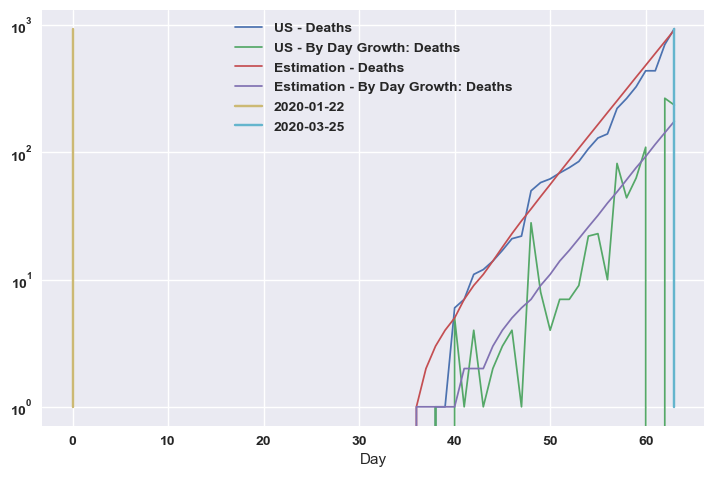

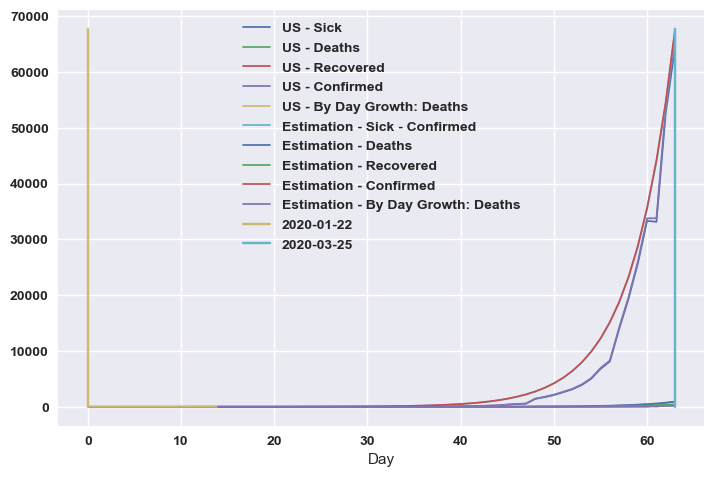

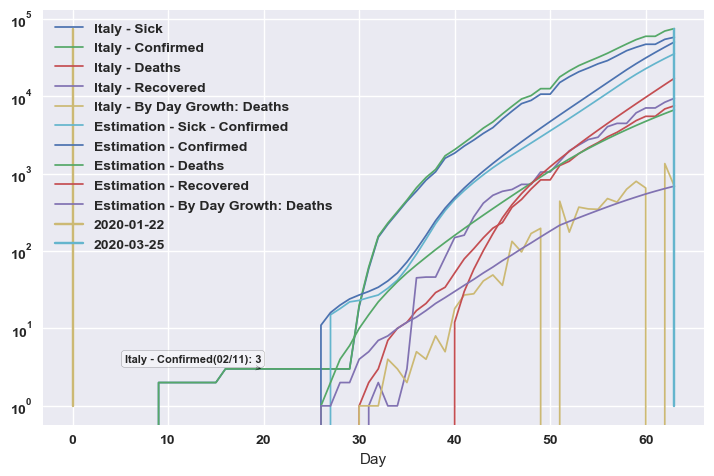

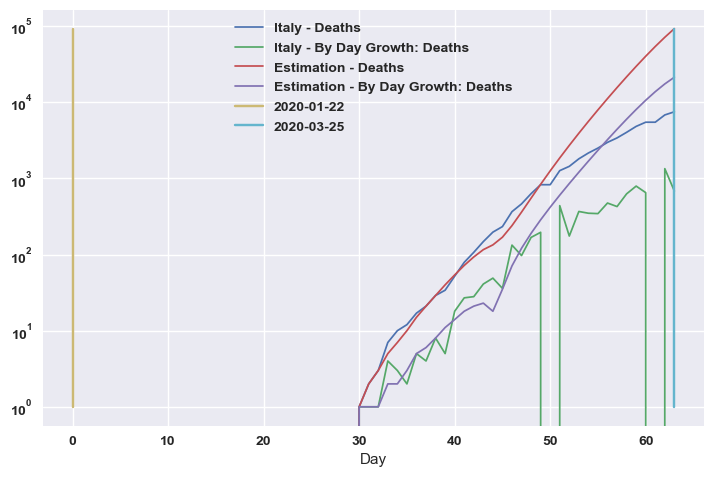

In [10]:
#____________________________________________________________________________________________________________
#Main Run Line

#Determine operating system (for mobile vs. PC)
if "android" in str(platform).lower():
    Settings["OS"] = "android"
elif "windows" in platform.system().lower():
    Settings["OS"] = "windows"
else:
    #Unchecked for other OS compatiability at the moment (linux may not be an issue)
    Settings["OS"] = "others"

Tables = []
PL     = []
SL     = []
Data   = {}
if os.path.exists("COVID_WIP.txt"):
    try:
        with open("COVID_WIP.txt", "r") as RF:
            Data = ast.literal_eval(RF.read())
        SVars  = ast.literal_eval(Data["Vars"])
        Tables = {x: ast.literal_eval(Data["Tables"][x]) for x in Data["Tables"].keys()}
        PL     = ast.literal_eval(Data["PL"])
        SL     = ast.literal_eval(Data["SL"])
        Data   = ast.literal_eval(Data["Data"])
    except:
        pass
    
if len([x for x in CLI if ".json" in x]) > 0 or len([x for x in CLI if ".json" not in x]) <= 2:
    main = Tk()
    main.title('COVID-19 Tracker')
    
    #Base screen info
    Settings["Size"] = [main.winfo_screenwidth(), main.winfo_screenheight()]
    Settings["Size"] = SizeSet(Settings["Size"], OSFlag = {"windows": [1200, 600]})
    
    #Full screen if it is android (or others)
    main.geometry("%dx%d" % tuple(Settings["Size"]))

    my_gui = MainGUI(main, Data, PL, SL, Vars = SVars, Tables = Tables)
    main.mainloop()
else:
    #Command Line Interface
    sys.exit("Not yet implemented")



In [11]:

#Modify can be passed to Var fix this
#Finish "Special" Operations button integration
#Finish sizings
#Redo General Info Display (split using a multitable with scroll)